##Connect to drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pwd
# Change directory
%cd ../content/gdrive/MyDrive/Colab Notebooks/Kaggle/NLP0
!pwd

/content
/content/gdrive/MyDrive/Colab Notebooks/Kaggle/NLP0
/content/gdrive/MyDrive/Colab Notebooks/Kaggle/NLP0


## Setup

### Libraries

In [3]:
import nltk                         # NLP toolbox
from os import getcwd
import pandas as pd                 # Library for Dataframes 
from nltk.corpus import twitter_samples 
import matplotlib.pyplot as plt     # Library for visualization
import numpy as np                  # Library for math functions

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

### Load Data

In [4]:
posneg_sent = pd.read_csv("data/posneg_sent.csv") # positive/negative word frequencies
#sent = pd.read_csv("data/sent.csv") # sentences ds
posneg_sent = posneg_sent.iloc[:,1:]
posneg_sent.head(3)

,bias,neg,pos,tgt
0,1,144,163,1
1,1,120,407,1
2,1,126,254,1


In [5]:
# Convert to arrays
X = posneg_sent[['bias', 'pos', 'neg']].values # Get only the numerical values of the dataframe
Y = posneg_sent['tgt'].values; # Put in Y the corresponding labels or sentiments

print(X.shape) # Print the shape of the X part
print(X) # Print some rows of X

(7613, 3)
[[  1 163 144]
 [  1 407 120]
 [  1 254 126]
 ...
 [  1  82  13]
 [  1 441 331]
 [  1 610 121]]


In [6]:
# Split the data on train & test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

## Train Logistic Regression

In [21]:
# Fit inital model
rnd = 123
# Fit model with all variables
logreg=sm.Logit(list(y_train),sm.add_constant(X_train),random_state=rnd)
model = logreg.fit()
print(model.summary())

# Predictions
Y_pred_test = model.predict(sm.add_constant(X_test))
# set up threshold
th = 0.5
logreg_pred = [1 if Y_pred_test[i]>th else 0 for i in range(len(Y_pred_test))]

print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))
print(accuracy_score(y_test, logreg_pred))

TypeError: ignored

In [23]:
# Get model parameters
theta = model.params
print(theta)

[-1.03616621  0.01472621 -0.00965107]


In [24]:
X = np.append(X_train,X_test,axis=0)
Y = np.append(y_train,y_test,axis=0)

Samples Scatter Plot

Text(0, 0.5, 'Negative')

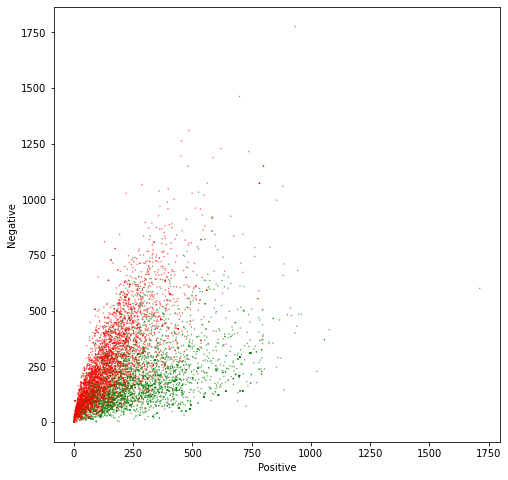

In [25]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color based on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

Plot model along hte data

In [ ]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (-w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested 
# in the direction. So this direction is just a perpendicular function to the 
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return    pos * theta[2] / theta[1]

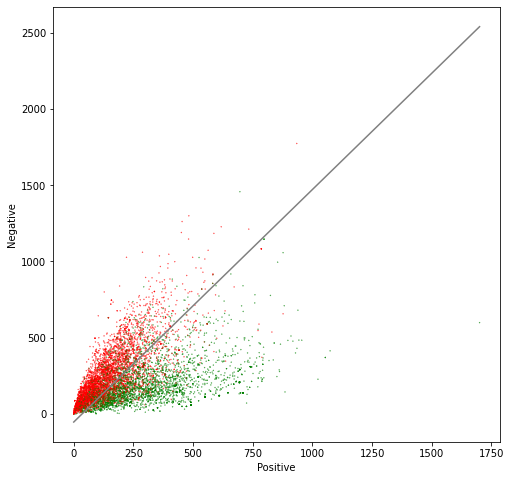

In [ ]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart. 
maxpos = np.max(X[:,1])

offset = 5000 # The pos value for the direction vectors origin

# Plot a gray line that divides the 2 areas.
ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') 

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()